In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

A. MODEL PERFROMANCE
1. Classification Performance Metrics :
    - Accuracy
    - Recall
    - ROC AUC
    - PR Curve
2. Regressi Performance Metrics

B. HYPERPARAMETER TUNING
1. Simple
2. Grid Search
3. Randomized Search

C. INFORMATION/DATA LEAKAGE
<br>D. ALGORITHM CHAINS


# __A. MODEL PERFORMANCE__ 

## __A1. CLASSIFICATION PERFORMANCE METRICS__ 

In [2]:
#1. Load dataset

bank = pd.read_csv('bankloan.csv')
bank.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1

In [3]:
#2. Menentukan var dependen dan independen

feature = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

X = bank[feature]
y = bank[target]

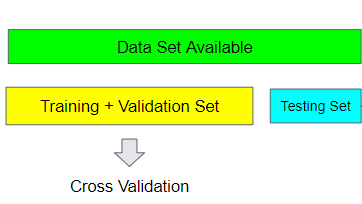

In [4]:
#3. Melakukan data splitting

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=2020)

### __MODEL PERFORMANCE IN TRAIN SET (Benchmark)__

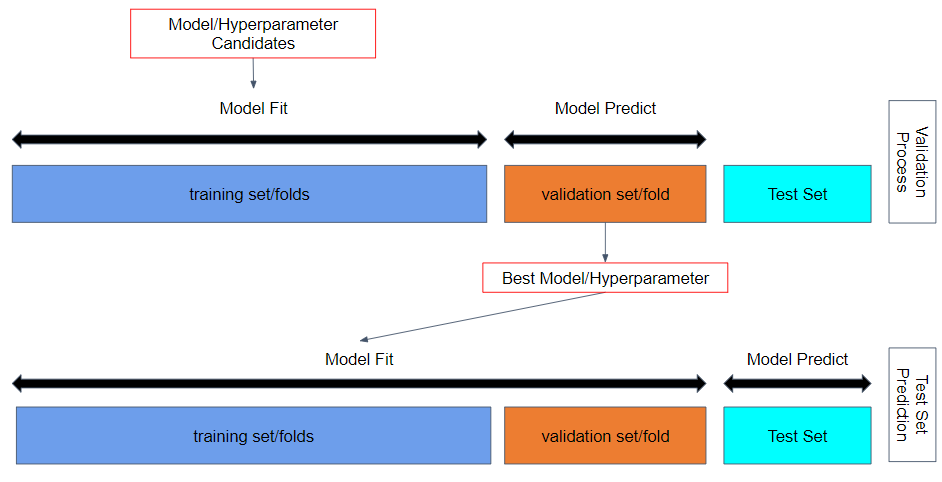

In [5]:
#3. Modelling dengan default parameter terlebih dahulu (Benchmark)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [6]:
#Untuk mengecek metrics apa aja yg ada di sklearn

import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

> ### __ACCURACY__

In [7]:
#4. Mencari nilai cross val tiap model dengan accuracy

from sklearn.model_selection import cross_val_score, StratifiedKFold

#stratifiedkfold = meng-guarantee ratio y pada train dan val sama (sama kyk stratify y)
skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True) 

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='accuracy')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='accuracy')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv = skfold, scoring='accuracy')

In [8]:
#5. Mencari nilai cross val tiap model

print('CV Logistic Regression', logreg_cv) #cukup stabil
print('CV KNN', knn_cv) #cukup stabil
print('CV DecisionTree', dtc_cv) #kurang stabil

CV Logistic Regression [0.78571429 0.76785714 0.75       0.84821429 0.83035714]
CV KNN [0.78571429 0.64285714 0.74107143 0.79464286 0.73214286]
CV DecisionTree [0.76785714 0.75892857 0.75       0.71428571 0.79464286]


In [9]:
#6. Mencari nilai rata2 cross val tiap model

print('Mean CV Logistic Regression', logreg_cv.mean()) #yang paling bagus
print('Mean CV KNN', knn_cv.mean())
print('Mean CV DecisionTree', dtc_cv.mean())

Mean CV Logistic Regression 0.7964285714285715
Mean CV KNN 0.7392857142857143
Mean CV DecisionTree 0.7571428571428572


> ### __RECALL__

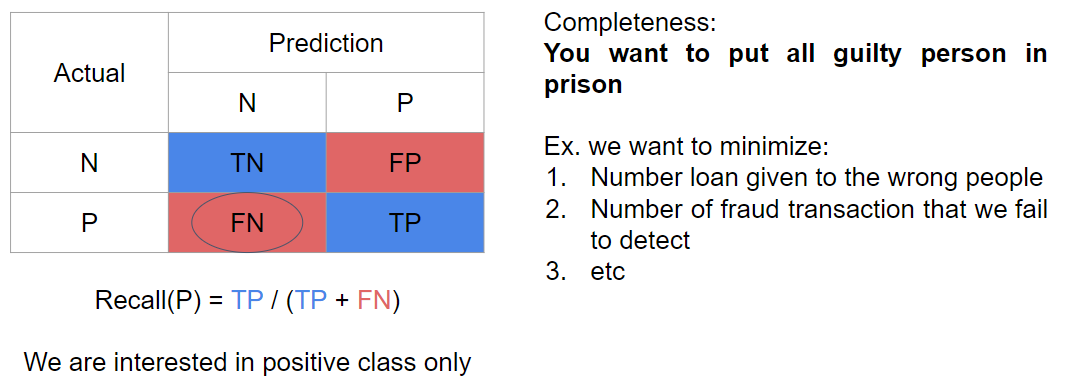

In [10]:
#1. Mencari nilai cross val tiap model dengan recall

skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True) # meng-guarantee ratio y pada train dan val, sama

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [11]:
#2. Mencari nilai cross val tiap model

print('CV Logistic Regression', logreg_cv)
print('CV KNN', knn_cv) 
print('CV DecisionTree', dtc_cv) 

CV Logistic Regression [0.43333333 0.51724138 0.31034483 0.48275862 0.44827586]
CV KNN [0.4        0.4137931  0.17241379 0.4137931  0.24137931]
CV DecisionTree [0.5        0.62068966 0.37931034 0.37931034 0.5862069 ]


In [12]:
#3. Mencari rataan nilai cross val tiap model

print('Mean CV Logistic Regression', logreg_cv.mean())
print('Mean CV KNN', knn_cv.mean())
print('Mean CV DecisionTree', dtc_cv.mean()) #yang paling bagus

Mean CV Logistic Regression 0.43839080459770124
Mean CV KNN 0.32827586206896553
Mean CV DecisionTree 0.4931034482758621


__FUNCTION MODEL EVALUATION__

In [13]:
#1. Model evaluation jadi gak perlu mengulangi code

def model_evaluation_cv(model, metric):
    skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
    return model_cv

In [14]:
#2. Model untuk print result

def print_results(model_cv):
    print('CV Score:',model_cv)
    print('CV Score Mean:', model_cv.mean())
    print('CV Score Std:', model_cv.std())

In [15]:
#3. contoh memanggil hasil function yg telah dibuat

model_cv = model_evaluation_cv(logreg, 'f1')
print_results(model_cv)

CV Score: [0.52       0.53571429 0.39130435 0.62222222 0.57777778]
CV Score Mean: 0.5294037267080745
CV Score Std: 0.07765953078015073


### __MODEL PERFORMANCE IN TEST SET__

In [16]:
#1. Melakukan modeling dengan hasil val

logreg.fit(X_train_val, y_train_val)

LogisticRegression()

In [17]:
#2. Melakukan prediksi dengan logreg (model yg dipilih dari hasil model performance diatas)

y_pred = logreg.predict(X_test)

In [18]:
#3. Mencari nilai model performance

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix

print('recall', recall_score(y_test, y_pred)) #hasil score di testing ada di dalam range di nilai cv
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4594594594594595
precision 0.7727272727272727
f1 0.576271186440678


In [19]:
#4. Membuat classification report

print(classification_report(y_test, y_pred))
#baris 0 = negatif
#baris 1 = positif, jadi lebih fokus yg kesini

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



In [20]:
#5. Melihat confusion matrix

confusion_matrix(y_test, y_pred)

array([[98,  5],
       [20, 17]], dtype=int64)

In [21]:
#Function untuk mengubah hasil cm ke df

def make_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_df = pd.DataFrame(
        {'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp]}, index = ['a_0', 'a_1', 'total_prediction']
    )
    conf_df['total_actual'] = conf_df['p_0'] + conf_df['p_1']
    return conf_df

In [22]:
#6. Menjadikan hasil confusion matrix menjadi dataframe

make_confusion_matrix(confusion_matrix(y_test, y_pred))

p_0  p_1  total_actual
a_0                98    5           103
a_1                20   17            37
total_prediction  118   22           140

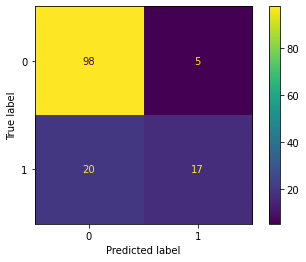

In [23]:
#7. Menjadikan hasil confusion matrix menjadi plot

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

> ## __ROC - AUC__

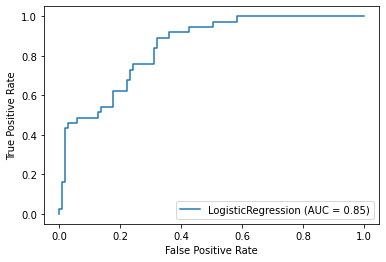

In [24]:
#8. Membuat plot roc

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, roc_curve, auc

plot_roc_curve(logreg, X_test, y_test)

In [25]:
#9. Mendapatkan ROC Curve dengan AUC Score

#a. Membuat proba
proba = logreg.predict_proba(X_test)
proba_1 = proba[:,1]
fpr, tpr, thr = roc_curve(y_test, proba_1)
auc_score = auc(fpr, tpr)

#b. dijadikan dataframe
thr_df = pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'THR': thr})
thr_df.head()

TPR       FPR       THR
0  0.000000  0.000000  1.946402
1  0.027027  0.000000  0.946402
2  0.027027  0.009709  0.936201
3  0.162162  0.009709  0.730020
4  0.162162  0.019417  0.703232

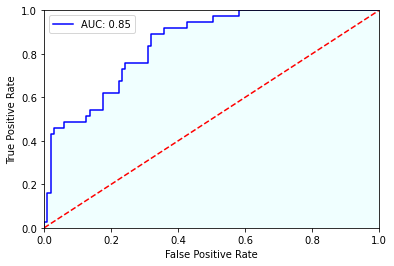

In [26]:
#c. Divisualisasikan dengan menampilkan auc score 

plt.plot(fpr, tpr, 'blue', label= f'AUC: {round(auc_score, 2)}')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr, tpr, 0, facecolor='azure', alpha=1)
plt.legend()
plt.show()

__NOTES:__
<br> AUC adalah area yg dibawah curve dengan nilai sebesar 0.85 (sudah cukup bagus).
<br> Semakin mendekati 1 nilai AUC, semakin bagus.
<br> Diharapkan true positive setinggi mungkin (recall) dan false positive serendah mungkin. 
<br> Kemungkinan area threshold berada di sekitar (fpr 0,4 ; tpr 0,8) 

In [27]:
#e. Mencari data yg berada di threshold

thr_df[(thr_df['TPR']>=0.8) & (thr_df['FPR'] <0.4)]

TPR       FPR       THR
23  0.837838  0.310680  0.260223
24  0.837838  0.320388  0.253305
25  0.891892  0.320388  0.239033
26  0.891892  0.359223  0.215838
27  0.918919  0.359223  0.215545

In [28]:
#10. Membandingkan hasil dengan menggeser threshold dengan hasil default

#HASIL GESER
#a. Menggeser threshold menjadi 0.21 (baris paling bawah, kolom paling kanan) == tergantung bussiness casenya
y_pred_021 = [1 if prob1 > 0.215545 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]

#b. membuat cm geser threshold
make_confusion_matrix(confusion_matrix(y_test, y_pred_021))

p_0  p_1  total_actual
a_0                66   37           103
a_1                 4   33            37
total_prediction   70   70           140

Nilai tn berkurang dari 98 -> 66

In [29]:
#c. Mengecek nilai recall hasil geser threshold

recall_score(y_test, y_pred_021)

0.8918918918918919

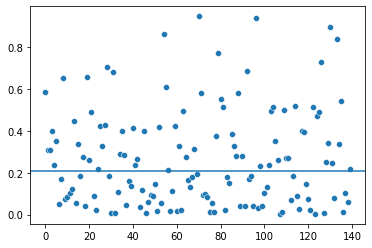

In [30]:
#Membuat plot threshold dipindah

import seaborn as sns

sns.scatterplot(x=range(len(proba_1)), y=proba_1)
plt.axhline(0.21)

In [31]:
print('ratio nasabah yang memberikan keuntungan:', 66/70*100)
print('ratio nasabah yang memberikan kerugian:', 4/70*100)

ratio nasabah yang memberikan keuntungan: 94.28571428571428
ratio nasabah yang memberikan kerugian: 5.714285714285714


In [32]:
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 37/70*100)
print('ratio kerugian yang dapat dikurangi:', 33/70*100)

ratio nasabah yang tidak jadi memberikan keuntungan: 52.85714285714286
ratio kerugian yang dapat dikurangi: 47.14285714285714


In [33]:
# HASIL DEFAULT
#a. Membuat cm default

make_confusion_matrix(confusion_matrix(y_test, y_pred))

p_0  p_1  total_actual
a_0                98    5           103
a_1                20   17            37
total_prediction  118   22           140

In [34]:
#b. Mengecek nilai recall default

recall_score(y_test, y_pred)

0.4594594594594595

In [35]:
print('ratio nasabah yang memberikan keuntungan:', 98/118*100)
print('ratio nasabah yang memberikan kerugian:', 20/118*100)

ratio nasabah yang memberikan keuntungan: 83.05084745762711
ratio nasabah yang memberikan kerugian: 16.94915254237288


In [36]:
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 5/22*100)
print('ratio kerugian yang dapat dikurangi:', 17/22*100)

ratio nasabah yang tidak jadi memberikan keuntungan: 22.727272727272727
ratio kerugian yang dapat dikurangi: 77.27272727272727


__NOTES:__
<br> Nanti decision makernya yg menentukan dan itu bukan kita yg menentukan pilih yg mana.

In [37]:
#Memperlihatkan bahwa data imbalanced

y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

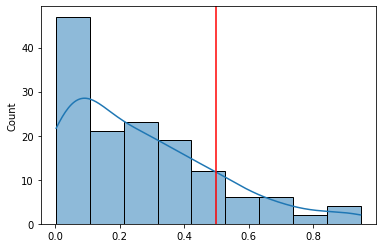

In [38]:
#Memperlihatkan bahwa data imbalanced dalam plot

sns.histplot(proba_1, kde=True)
plt.axvline(0.5, color='red')

> ## __PRECISION-RECALL CURVE__

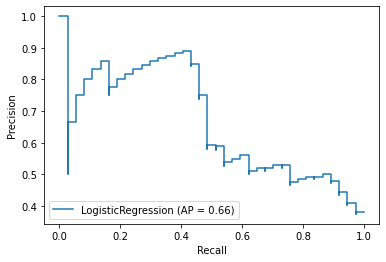

In [39]:
#1. Membuat PR Curve plot dengan model regresi linear yg telah dipilih

plot_precision_recall_curve(logreg, X_test, y_test)

In [40]:
#2. Mendapatkan nilai pr curve dan dijadikan dataframe

pr, rc, thrs = precision_recall_curve(y_test, proba_1)

pr_df = pd.DataFrame({'Precision': pr[:-1], 'Recall': rc[:-1], 'Thresholds': thrs})
pr_df.head()

Precision    Recall  Thresholds
0   0.381443  1.000000    0.099279
1   0.375000  0.972973    0.102397
2   0.378947  0.972973    0.102422
3   0.382979  0.972973    0.103093
4   0.387097  0.972973    0.108954

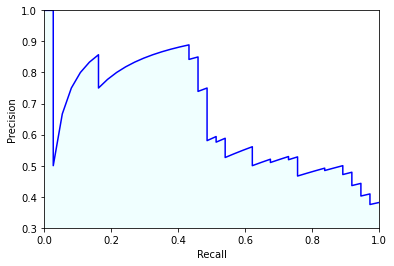

In [41]:
#3. Memvisualisasikan pr curve

plt.plot(rc, pr, 'blue')
# plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0.3,1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.fill_between(rc, pr, 0, facecolor='azure', alpha=1)
# plt.legend()
plt.show()

In [42]:
#4. Perkiraan area threshold dengan asumsi plot

pr_df[pr_df['Precision'].between(0.6, 0.8)].sort_values('Recall', ascending=False)

Precision    Recall  Thresholds
67   0.600000  0.486486    0.425608
68   0.620690  0.486486    0.446007
69   0.642857  0.486486    0.470058
70   0.666667  0.486486    0.489636
71   0.692308  0.486486    0.489714
72   0.720000  0.486486    0.494383
73   0.750000  0.486486    0.494954
74   0.739130  0.459459    0.498525
75   0.772727  0.459459    0.511705
87   0.800000  0.216216    0.682691
88   0.777778  0.189189    0.683386
89   0.750000  0.162162    0.703232
92   0.800000  0.108108    0.839385
93   0.750000  0.081081    0.863196
94   0.666667  0.054054    0.896984

In [43]:
#5. Menggeser threshold 


#Menggeser threshold menjadi 0.21 (baris paling bawah, kolom paling kanan) == tergantung bussiness casenya
y_pred049 = [1 if prob1 > 0.494954 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]
y_pred049[:5]

[1, 0, 0, 0, 0]

In [44]:
#6. Membuat cm dari hasil geser threshold

make_confusion_matrix(confusion_matrix(y_test, y_pred049))

p_0  p_1  total_actual
a_0                97    6           103
a_1                19   18            37
total_prediction  116   24           140

In [45]:
print('ratio nasabah yang memberikan keuntungan:', 97/116*100)
print('ratio nasabah yang memberikan kerugian:', 19/116*100)
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 6/24*100)
print('ratio kerugian yang dapat dihindari:', 18/24*100)

ratio nasabah yang memberikan keuntungan: 83.62068965517241
ratio nasabah yang memberikan kerugian: 16.379310344827587
ratio nasabah yang tidak jadi memberikan keuntungan: 25.0
ratio kerugian yang dapat dihindari: 75.0


# __B. HYPERPARAMETER TUNING__

> ## __B1. Simple Hyperparameter Tuning__

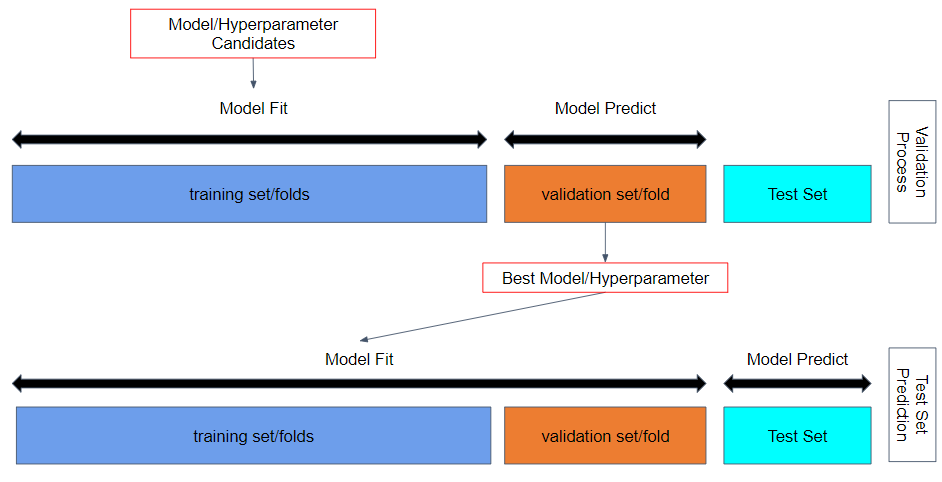

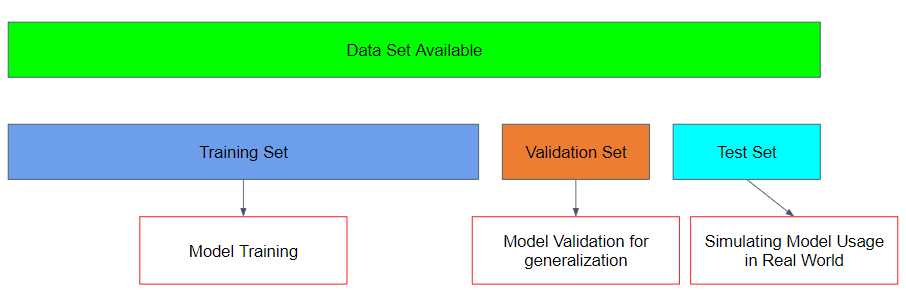

In [46]:
#1. Data splitting

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify = y_train_val, test_size=.25, random_state=2020) 

In [47]:
#2. Melakukan hyperparameter secara manual (memakai semua data di train val)

from sklearn.metrics import f1_score

#a. membuat pilihan hyperparam
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

#b. guarantee y proportion
skfold = StratifiedKFold(n_splits=5)

#c. Melakukan hyperparameter
best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
    cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='f1').mean()
    cv_score_validation_fold.append(cv_score)
    
    if cv_score > best_score:
        best_score = cv_score
        best_params = {'C':i}

In [48]:
#3. Mengetahui nilai best score dan best param

print('best score', best_score)
print('best params', best_params)

best score 0.5563225088777649
best params {'C': 0.05}


In [49]:
#4. Melakukan hyperparameter secara manual (dilakukan pada train & val terpisah)

#a. membuat pilihan hyperparam
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

#b. Melakukan hyperparameter
training_score = []
val_score = []

for i in hyperparam_c:
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
    logreg.fit(X_train, y_train)
    
    y_predict_train = logreg.predict(X_train)
    training_score.append(f1_score(y_train, y_predict_train))
    
    y_predict_val = logreg.predict(X_val)
    val_score.append(f1_score(y_val, y_predict_val))

In [50]:
#c. Melihat nilai training dan val score

print('Training score', training_score)
print('Val score', val_score)

Training score [0.5425531914893617, 0.5425531914893617, 0.5425531914893617, 0.5425531914893617, 0.5425531914893617, 0.5425531914893617, 0.5502645502645502, 0.553191489361702, 0.549222797927461, 0.5360824742268041, 0.5671641791044777, 0.5555555555555556, 0.48979591836734687, 0.4444444444444444, 0.15873015873015875]
Val score [0.5714285714285715, 0.5714285714285715, 0.5714285714285715, 0.5714285714285715, 0.5714285714285715, 0.5714285714285715, 0.5625000000000001, 0.606060606060606, 0.619718309859155, 0.6301369863013699, 0.631578947368421, 0.6052631578947367, 0.5352112676056338, 0.5294117647058824, 0.09999999999999999]


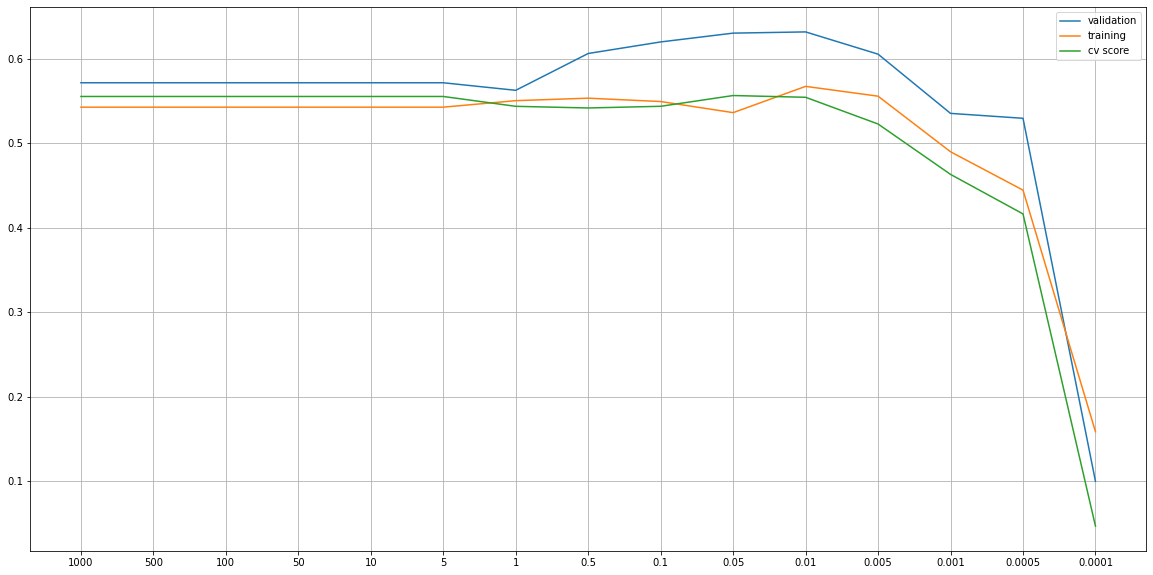

In [51]:
#5. Melakukan perbandingan train, val, cv score

length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, val_score)
sns.lineplot(length, training_score)
sns.lineplot(length, cv_score_validation_fold)
plt.legend(['validation', 'training', 'cv score'])
plt.xticks(length,hyperparam_c)
plt.grid()
plt.show()

### __Final Result Comparison : Simple Hyperparameter Tuning__

> __BENCHMARK__

In [52]:
#1. Membuat classification report (pake benchmark)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_val, y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



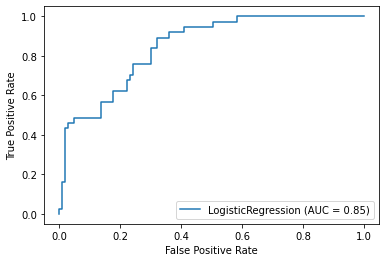

In [53]:
#2. Membuat plot roc curve

plot_roc_curve(logreg, X_test, y_test)
#akan mengeluarkan satu nilai untuk dibandingkan dengan model lain
#ROC menghasilkan nilai AUC

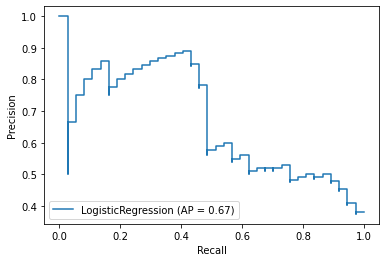

In [54]:
#3. Membuat plot pr curve 

plot_precision_recall_curve(logreg, X_test, y_test)
#akan mengeluarkan satu nilai untuk dibandingkan dengan model lain
#PR curve menghasilkan nilai AP (average precision)

> __C TERBAIK YG TELAH DIDAPATKAN__

In [55]:
#1. Membuat classification report (pake C terbaik yg telah didapatkan)

logreg = LogisticRegression(solver='liblinear', C=0.05)
logreg.fit(X_train_val, y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



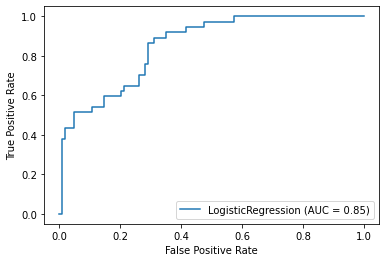

In [56]:
#2. Membuat plot roc curve

plot_roc_curve(logreg, X_test, y_test)
#akan mengeluarkan satu nilai untuk dibandingkan dengan model lain
#ROC menghasilkan nilai AUC

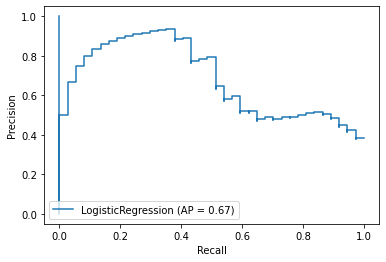

In [57]:
#3. Membuat plot pr curve 

plot_precision_recall_curve(logreg, X_test, y_test)
#akan mengeluarkan satu nilai untuk dibandingkan dengan model lain
#PR curve menghasilkan nilai AP (average precision)

__SUMMARY:__
<br>
In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)
1. changes the model

> ## __B2. Grid Search Hyperparameter Tuning__

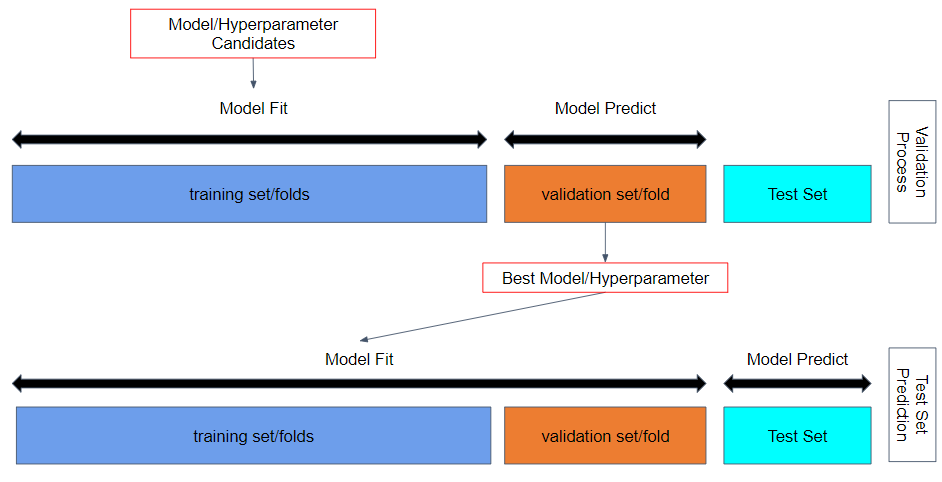

In [58]:
#1. Import Library

from sklearn.model_selection import GridSearchCV

In [59]:
#Mengecek nama parameter (benchmark)  yg ada di Logistic Regression

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
#2. Membuat membuat pilihan hyperparam dan nama key harus sama persis namanya dengan parameternya

hyperparam_space = {
     'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # benchmark max_iter = 100
}

__Scenario:__
1. C  15 hyperparameters
1. max_iter 6
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [61]:
#3. Melakukan hyperparameter tunning dengan grid search

skfold = StratifiedKFold(n_splits=5)

logreg = LogisticRegression(solver='liblinear', random_state=2020)

grid_search = GridSearchCV(
    logreg, # model
    param_grid = hyperparam_space, # pilihan hyperaparameter
    cv = skfold,
    scoring='f1',
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    7.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1', verbose=1)

In [62]:
#4. Menampilkan best score dan best parameter

print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

best score 0.5563225088777649
best params {'C': 0.05, 'max_iter': 100}


In [63]:
#5. Membuat dataframe dari hasil gridsearch

report_grid = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
59       0.007997      0.001265         0.006994        0.003031    0.05   
57       0.008194      0.001468         0.006197        0.000748    0.05   
56       0.010394      0.004921         0.005997        0.000632    0.05   
55       0.008193      0.001937         0.008197        0.004017    0.05   
54       0.008395      0.001959         0.005997        0.001548    0.05   
58       0.009794      0.002925         0.006197        0.001938    0.05   

   param_max_iter                         params  split0_test_score  \
59           1000  {'C': 0.05, 'max_iter': 1000}           0.528302   
57            400   {'C': 0.05, 'max_iter': 400}           0.528302   
56            300   {'C': 0.05, 'max_iter': 300}           0.528302   
55            200   {'C': 0.05, 'max_iter': 200}           0.528302   
54            100   {'C': 0.05, 'max_iter': 100}           0.528302   
58            500   {'C': 0.05, 'max_iter': 500}           0.528302   

    split1_test_score  split2_test_score  split3_test_score  \
59           0.530612           0.607143               0.56   
57           0.530612           0.607143               0.56   
56           0.530612           0.607143               0.56   
55           0.530612           0.607143               0.56   
54           0.530612           0.607143               0.56   
58           0.530612           0.607143               0.56   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
59           0.555556         0.556323        0.028436                1  
57           0.555556         0.556323        0.028436                1  
56           0.555556         0.556323        0.028436                1  
55           0.555556         0.556323        0.028436                1  
54           0.555556         0.556323        0.028436                1  
58           0.555556         0.556323        0.028436                1

__Summary:__
<br> This method still resulted in C = 0.05 max_iter = 100 which is basically the same. 
<br> So, no effect in adding max_iter. you can use another method or more FE. 

## __A2. REGRESSION PERFORMANCE METRICS__ 

### Model Performance and Evaluation Method : tips dataset

In [64]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
#2. Menentukan variabel independen dan dependent

X = pd.get_dummies(tips.drop('tip', axis=1)) #lgsg encode
y = tips['tip']

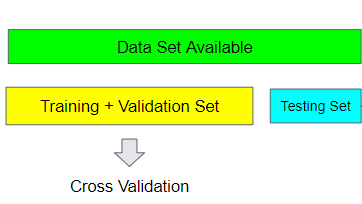

In [67]:
#3. Data splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

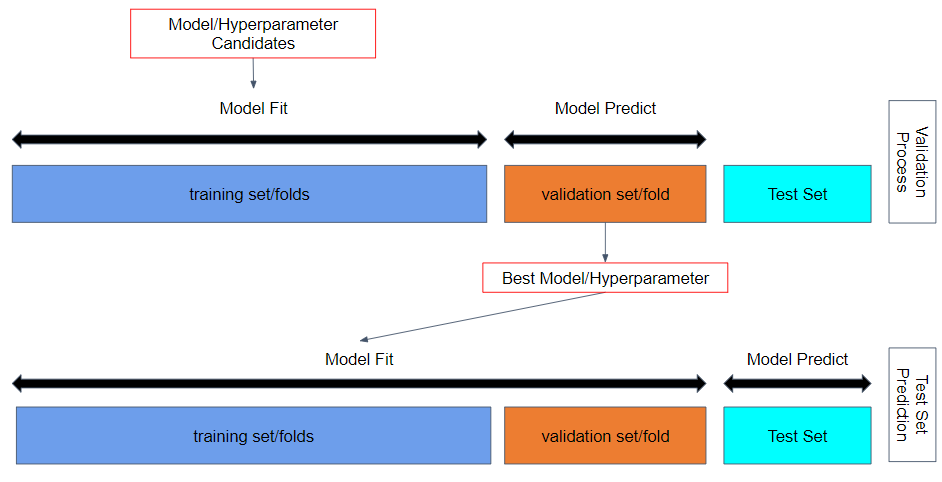

__Model Evaluation : Benchmark__

In [68]:
#4. Melakukan regression model fitting

dtr = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
linreg = LinearRegression()

In [69]:
#untuk melihat segala macam metric untuk dipakai di cv (penulisan untuk scoring)

from sklearn.metrics import SCORERS

SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [70]:
#5. Melakukan cross validation

from sklearn.model_selection import cross_val_score
import warnings

#b. untuk decision tree
model_cv = cross_val_score(dtr, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')
print('CV Score', model_cv)
print('CV Score Mean', model_cv.mean())
print('CV Score Std', model_cv.std())

CV Score [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV Score Mean -1.2432694552627068
CV Score Std 0.28004351146399903


In [71]:
#b. untuk linear regression

model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')
print('CV Score', model_cv)
print('CV Score Mean', model_cv.mean())
print('CV Score Std', model_cv.std())

CV Score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV Score Mean -1.1320214803006685
CV Score Std 0.33933163195266225


__NOTES:__
<br> Hasil cross validation diatas, perhatikan nilai cv score Mean.
<br> Nilai score cv semakin mendekati nol, semakin bagus.
<br> Jadi lebih bagus adalah model decision tree (harusnya yg dipilih linreg (iyagaksi?).

In [72]:
#Untuk melihat semua parameter yg digunakan saat model dtr (hasil cv diatas)

dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2020,
 'splitter': 'best'}

In [73]:
#6. Melakukan model fitting pada train set

dtr.fit(X_train_val, y_train_val)

DecisionTreeRegressor(max_depth=5, random_state=2020)

In [74]:
#7. Melakukan prediksi

y_pred = dtr.predict(X_test)

In [75]:
#8. Mencari nilai mse

print(mean_squared_error(y_test, y_pred))

1.4808803946104496


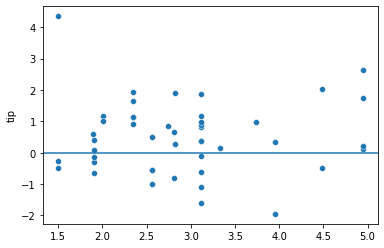

In [76]:
#9. Melakukan residual analysis

residual = y_test - y_pred

sns.scatterplot(y_pred, residual)
plt.axhline(0)

> ## __B3. Randomized Search Hyperparameter Tuning__

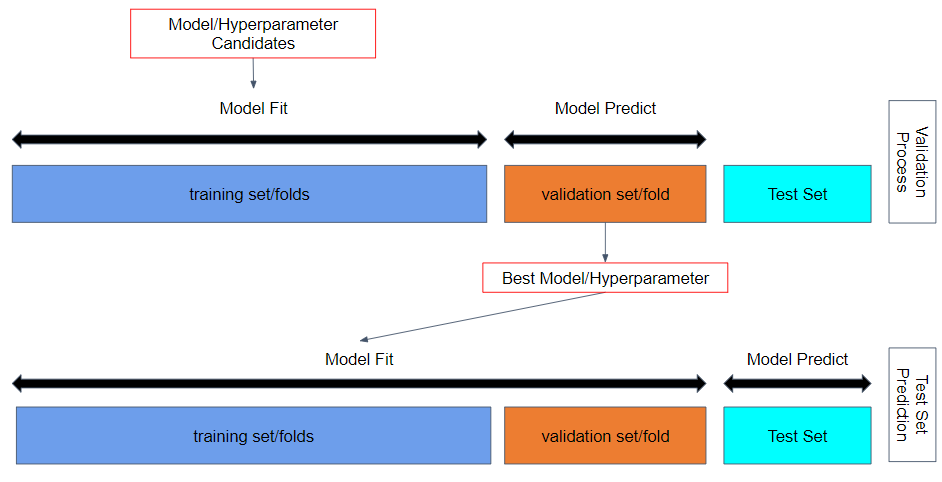

In [77]:
#10. Melakukan hyperparameter tuning deng randomized search

from sklearn.model_selection import RandomizedSearchCV

#a. Membuat hyperparameter list
#parameter ikuti sesuai algoritma yg dipilih, kita pake dtr (terlihat di dtr.get_params)
hyperparam_space = {
    'min_samples_leaf':[1,5,10,15,20,50], # benck mark min_samples_leaf = 1
    'max_depth':[2,3,4,5,6,7], # bench mark max_depth = 5
    'criterion':['mse','mae'] # bench mark mse
}

In [78]:
#b. Membuat persiapan tuning

randomized_search = RandomizedSearchCV(
    dtr,
    hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1,
    verbose=1
)

__Notes:__
<br> Jumlah itteration seharusnya dilakukan sebanyak 72 kali
<br> jumlah min_sample_leaf = 6
<br> jumlah max_depth = 6
<br> jumlah criterion = 2

6 x 6 x 2 = 72

Namun kita batasin n_iter (randomized search) = 20, jadi 52 kandidat tidak terpilih

In [79]:
#c. Melakukan hyperparameter tuning (dilakukan 100 kali fitting = 20 x 5)

randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error',
                   verbose=1)

In [80]:
#d. Mendapatkan nilai best score hasil randomized search

print('best score', randomized_search.best_score_)
print('best params', randomized_search.best_params_)

best score -0.9829038972124049
best params {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [81]:
#membuat tabel dari hasil randomized search

rs_df = pd.DataFrame(randomized_search.cv_results_)
rs_df.sort_values('mean_test_score')

#mean test score semakin dekat dengan 0, semakin bagus

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.010992      0.002897         0.015789        0.006788   
1        0.009395      0.003071         0.014391        0.017818   
2        0.007796      0.001720         0.004597        0.000490   
16       0.011194      0.004017         0.013192        0.010063   
11       0.010591      0.003611         0.007794        0.005303   
17       0.017589      0.010084         0.006596        0.003261   
7        0.008394      0.002869         0.008596        0.007224   
5        0.018992      0.013904         0.009392        0.005571   
15       0.011394      0.008841         0.010394        0.010850   
18       0.014391      0.006648         0.005398        0.001019   
10       0.008995      0.002098         0.006996        0.003998   
8        0.015589      0.012777         0.007399        0.004838   
4        0.009594      0.002244         0.006197        0.002712   
19       0.015790      0.003918         0.008797        0.007777   
3        0.014991      0.007819         0.005797        0.001720   
13       0.019991      0.011464         0.005595        0.002246   
12       0.014195      0.005974         0.007392        0.003261   
0        0.013192      0.004705         0.005998        0.001673   
9        0.007802      0.002485         0.004190        0.000966   
6        0.015391      0.012886         0.007596        0.005234   

   param_min_samples_leaf param_max_depth param_criterion  \
14                     50               5             mae   
1                       5               7             mse   
2                       5               4             mse   
16                     15               6             mse   
11                     15               7             mse   
17                     10               4             mse   
7                       5               3             mse   
5                      50               7             mse   
15                     50               4             mse   
18                     15               5             mae   
10                     15               3             mae   
8                      20               4             mae   
4                       5               2             mae   
19                     15               2             mae   
3                      20               2             mae   
13                     10               3             mae   
12                     20               7             mse   
0                       1               2             mae   
9                       1               2             mse   
6                       1               4             mse   

                                               params  split0_test_score  \
14  {'min_samples_leaf': 50, 'max_depth': 5, 'crit...          -0.852846   
1   {'min_samples_leaf': 5, 'max_depth': 7, 'crite...          -1.266981   
2   {'min_samples_leaf': 5, 'max_depth': 4, 'crite...          -1.144108   
16  {'min_samples_leaf': 15, 'max_depth': 6, 'crit...          -0.956966   
11  {'min_samples_leaf': 15, 'max_depth': 7, 'crit...          -0.956966   
17  {'min_samples_leaf': 10, 'max_depth': 4, 'crit...          -1.118471   
7   {'min_samples_leaf': 5, 'max_depth': 3, 'crite...          -0.987999   
5   {'min_samples_leaf': 50, 'max_depth': 7, 'crit...          -0.879731   
15  {'min_samples_leaf': 50, 'max_depth': 4, 'crit...          -0.879731   
18  {'min_samples_leaf': 15, 'max_depth': 5, 'crit...          -0.743851   
10  {'min_samples_leaf': 15, 'max_depth': 3, 'crit...          -0.743851   
8   {'min_samples_leaf': 20, 'max_depth': 4, 'crit...          -0.805774   
4   {'min_samples_leaf': 5, 'max_depth': 2, 'crite...          -0.722048   
19  {'min_samples_leaf': 15, 'max_depth': 2, 'crit...          -0.722048   
3   {'min_samples_leaf': 20, 'max_depth': 2, 'crit...          -0.722048   
13  {'min_samples_leaf': 10, 'max_depth': 3, 'crit...          -0.766951   
1

## Final Result Comparison

> __BENCHMARK__

In [82]:
#1.Mencari nilai mse dari model benchmark

tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.1861051713961641


> __BEST PARAMS__

In [83]:
#Mengetahui best param dari best estimator dari random search

randomized_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2020,
 'splitter': 'best'}

In [84]:
##Mengetahui best param

randomized_search.best_params_

{'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}

In [85]:
#1.Mencari nilai mse dari hasil best estimator(model yg sudah disetting dengan best param)

tree_tuned = randomized_search.best_estimator_
tree_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = tree_tuned.predict(X_test)
print(mean_squared_error(y_test, y_pred_tuned))

1.3093536770005814


__Kesimpulan:__
- Hasil nilai rmse, lebih baik pada model hasil tunning.
- Semakin kecil nilai rmse, semakin baik.
- rmse dan mse tidak ada rentang terbaik, jadi harus dibandingkan rmse dan mse model lain

# __C. INFORMATION/DATA LEAKAGE__

Kebocoran data, yaitu ketika preprocess fitnya sampe model predict

#### __DATASET SEDERHANA__

In [86]:
#1. Menentukan variabel dependen dan independen

rnd = np.random.RandomState(seed = 2020)
X = rnd.normal(size = (100, 10000))
y = rnd.normal(size = (100, ))

In [87]:
#Mengecek jumlah kolom X

X.shape

(100, 10000)

In [88]:
#Mengecek jumlah kolom y

y.shape

(100,)

Data generated with condition that there is no relationship between X and y

In [89]:
#2. Dibuat dalam dataframe

x_df = pd.DataFrame(X)
x_df['y'] = y

> __YANG SALAH, TERDAPAT INFORMATION LEAKAGE__

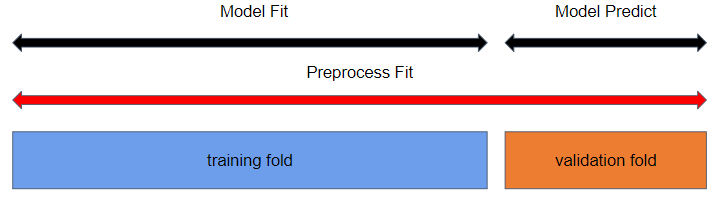

In [90]:
#ini salah, karena ada leakage(kebocoran data)

from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X,y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [91]:
#mengecek score cv

from sklearn.linear_model import Ridge
cross_val_score(Ridge(), X_selected, y, cv=5)

#mendapatkan hasil cv yg sangat bagus(ada information leakage)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

> __YANG BENAR, TIDAK TERDAPAT INFORMATION LEAKAGE__

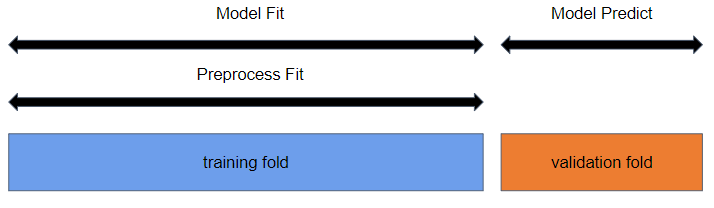

In [92]:
#biar gak bocor, pake pipeline (select dan ridge masuk didalam pipe)

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('select', select),
    ('ridge', Ridge())
])

In [93]:
#mengecek score cv dengan pipe

cross_val_score(pipe, X, y, cv=5)
#hasilnya negatif semua

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

__SUMMARY:__
<br> this is what the result should be the R-square is vary small or even negative. Information leakege show that the model can have overly optimistic result to validation folds.

# __D. ALGORITHM CHAINS__

#### __ADULT DATASET__

> __DATA__

In [94]:
#1. Load dataset

df_adult = pd.read_csv('adult.csv')
df_adult.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [95]:
#2. Replace tanda tanya dengan nan

df_adult.replace('?', np.nan, inplace=True)

In [96]:
#3. Mengecek jumlah data yg kosong 

df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

> __PREPROCESSING__

In [97]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [98]:
#1. Membuat pipeline untuk impute dan encode
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_encoder', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

In [115]:
#2. menentukan variabel dependen dan independen == data splitting

X = df_adult.drop(columns=['fnlwgt', 'income', 'education'])
y = np.where(df_adult['income']=='>50K',1,0)

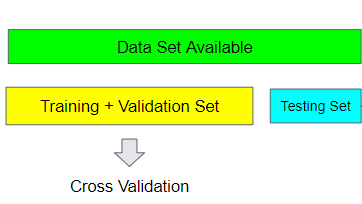

In [116]:
#3. Data Splitting (stratify karena classification)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=2020
)

> #### __Model Evaluation : Benchmark__

In [117]:
#4. Melakukan model fitting

#kalo benchmark, biasanya isinya sesuai default aja benchmarknya, gausa pake yg dalem kurung diatas

skfold = StratifiedKFold(n_splits=5) #fungsi sama kayak stratify
tree = DecisionTreeClassifier(random_state=2020) # benchmark entropy, 5, random_state = 2020

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', tree)
])

In [118]:
#5. Melakukan evaluation method

model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring='f1', cv=skfold)

In [119]:
#mengecek nilai cv score

print('CV Score:', model_cv)
print('CV Score Mean:', model_cv.mean())
print('CV Score Standard Deviation:', model_cv.std())

CV Score: [0.60702341 0.63231441 0.58983348 0.61254296 0.6104626 ]
CV Score Mean: 0.6104353718525161
CV Score Standard Deviation: 0.013558867413472207


__FLEXIBLE METRICS__

In [104]:
#1. Function untuk melakukan model evaluation

def model_evaluation_cv(model, metric, transformer):
    skfold = StratifiedKFold(n_splits=5)

    estimator = Pipeline([
        ('preprocess', transformer),
        ('clf', model)
    ])
    
    model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring=metric, cv=skfold)
    print('CV Score', model_cv)
    print('CV Score Mean', model_cv.mean())
    print('CV Score Standard Deviation', model_cv.std())
    
    return model_cv

> #### __Model Evaluation : Logistic Regression__

In [105]:
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'
trans = transformer

logit_cv = model_evaluation_cv(model, metric, trans)

CV Score [nan nan nan nan nan]
CV Score Mean nan
CV Score Standard Deviation nan


> #### __Model Evaluation : Decision Tree__

In [106]:
model = DecisionTreeClassifier(random_state=2020)
metric = 'f1'
trans = transformer

dtr_cv = model_evaluation_cv(model, metric, trans)

CV Score [0. 0. 0. 0. 0.]
CV Score Mean 0.0
CV Score Standard Deviation 0.0


__Notes:__
- Langsung cek cv score mean saja untuk perbanding
- Lebih bagus nilai evaluation Logistic Regression, jadi selanjutnya pake logistic regression.

In [120]:
#1. Dilatihkan ke train val

logit = LogisticRegression(solver = 'liblinear', random_state=2020)

estimator = Pipeline([
    ('preprocess',transformer),
    ('clf', logit)
])

estimator.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marita

In [121]:
#2. Melakukan prediksi

y_pred = estimator.predict(X_test)

In [122]:
#3. Membuat classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



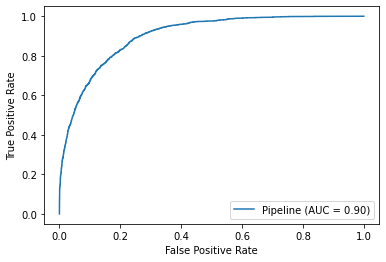

In [123]:
#4. Membuat plot roc curve

plot_roc_curve(estimator, X_test, y_test)
#nilai auc 0,9 berarti bagus (cocok untuk model yg tidak cenderung ke satu kelas)

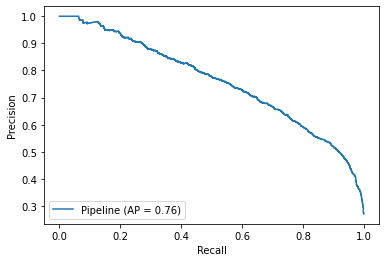

In [124]:
#5. Membuat plot pr curve

plot_precision_recall_curve(estimator, X_test, y_test)
#nilai auc 0,76 berarti cukup bagus (cocok untuk model yg cenderung ke satu kelas cenderung ke satu kelas)

__Model linear regression sudah jadi, lalu dilakukan hyperparameter tunning__

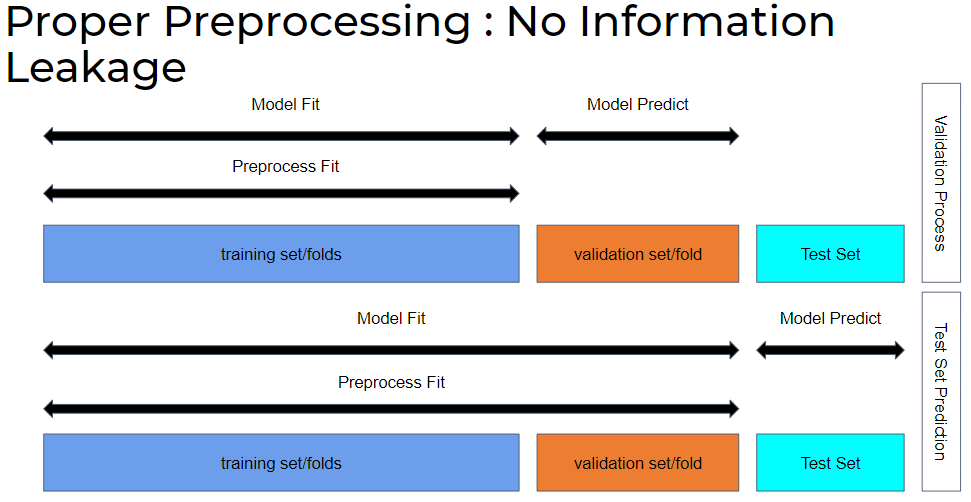

 __HYPERPARAMETER TUNING__

In [125]:
#6. Melakukan hyperparameter tunning

logit = LogisticRegression(solver = 'liblinear', random_state=2020)

estimator = Pipeline([
    ('preprocess',transformer),
    ('clf',logit)
])

# estimator.get_params() == untuk mengecek nama parameter di estimator yg dibuat

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear', 'newton-cg']
}

skfold = StratifiedKFold(n_splits=5)

gridsearch = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs=-1,
    verbose=1
)

In [126]:
#fit hyperparamater tuning

gridsearch.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary_encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                              

In [127]:
#7. Menghitung best score dan mencari best param

print('best_score', gridsearch.best_score_)
print('best_score', gridsearch.best_params_)

best_score 0.6460237640462658
best_score {'clf__C': 100, 'clf__solver': 'newton-cg'}


In [128]:
#8. Dijadikan dataframe hasil cv

pd.DataFrame(gridsearch.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_clf__C  \
0        1.750552      0.187869         0.204481        0.033826          100   
1       19.712743      2.229016         0.205677        0.023360          100   
2        2.092621      0.126185         0.159719        0.026134           10   
3       14.207463      1.471147         0.188009        0.019594           10   
4        2.410883      0.315480         0.193360        0.023932            1   
5       10.683370      0.871405         0.177927        0.040232            1   
6        1.985787      0.428506         0.169353        0.026372          0.1   
7        7.254743      0.717967         0.129788        0.007905          0.1   
8        1.331435      0.055642         0.114336        0.006622         0.01   
9        5.733625      0.285548         0.143290        0.018296         0.01   
10       1.240529      0.058864         0.114650        0.007556        0.001   
11       4.741111      0.886414         0.103354        0.030339        0.001   

   param_clf__solver                                         params  \
0          liblinear    {'clf__C': 100, 'clf__solver': 'liblinear'}   
1          newton-cg    {'clf__C': 100, 'clf__solver': 'newton-cg'}   
2          liblinear     {'clf__C': 10, 'clf__solver': 'liblinear'}   
3          newton-cg     {'clf__C': 10, 'clf__solver': 'newton-cg'}   
4          liblinear      {'clf__C': 1, 'clf__solver': 'liblinear'}   
5          newton-cg      {'clf__C': 1, 'clf__solver': 'newton-cg'}   
6          liblinear    {'clf__C': 0.1, 'clf__solver': 'liblinear'}   
7          newton-cg    {'clf__C': 0.1, 'clf__solver': 'newton-cg'}   
8          liblinear   {'clf__C': 0.01, 'clf__solver': 'liblinear'}   
9          newton-cg   {'clf__C': 0.01, 'clf__solver': 'newton-cg'}   
10         liblinear  {'clf__C': 0.001, 'clf__solver': 'liblinear'}   
11         newton-cg  {'clf__C': 0.001, 'clf__solver': 'newton-cg'}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.606654           0.660085           0.632089   
1            0.625773           0.665730           0.628846   
2            0.618005           0.661343           0.631120   
3            0.625119           0.665730           0.628846   
4            0.606565           0.664467           0.633317   
5            0.624762           0.664477           0.627526   
6            0.601779           0.646301           0.629720   
7            0.622778           0.661633           0.623188   
8            0.578785           0.587368           0.562803   
9            0.615007           0.636719           0.605144   
10           0.431373           0.448276           0.392405   
11           0.557794           0.559358           0.536559   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.642185           0.665728         0.641348        0.021145   
1            0.642790           0.666980         0.646024        0.017568   
2            0.640535           0.665728         0.643346        0.018024   
3            0.643093           0.666980         0.645954        0.017710   
4            0.643363           0.665728         0.642688        0.021901   
5            0.642756           0.666353         0.645175        0.017636   
6            0.637363           0.644068         0.631846        0.016108   
7            0.644550           0.664775         0.643385        0.018025   
8            0.584631           0.588912         0.580500        0.009499   
9            0.625490           0.652724         0.627017        0.016613   
10           0.431108           0.439601         0.428553        0.019143   
11           0.569910           0.572038         0.559132        0.012603   

    rank_test_score  
0                 7  
1                 1  
2                 5  
3                 2  
4                 6  
5                 3  
6                 8  
7                 4  
8     

__MEMBANDINGKAN BENCHMARK DAN HASIL TUNING__

> __BENCHMARK MODEL WITH ESTIMATOR__

In [129]:
#mengecek estimator

estimator

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marita

In [130]:
#1. Melakukan model fitting & prediksi

estimator.fit(X_train_val, y_train_val)
y_pred = estimator.predict(X_test)

In [131]:
#2. Membuat classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [132]:
#3. Membuat confussion matrix

make_confusion_matrix(confusion_matrix(y_test, y_pred))

p_0   p_1  total_actual
a_0               5762   419          6181
a_1                807  1153          1960
total_prediction  6569  1572          8141

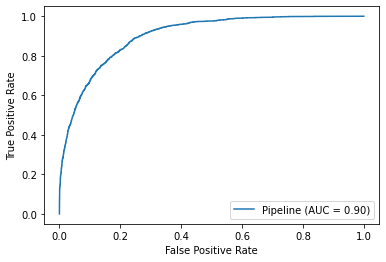

In [133]:
#4. Membuat roc curve

plot_roc_curve(estimator, X_test, y_test)

> __TUNED MODEL__

In [134]:
#1. Melakukan fiting model dengan best estimator dan hyperparameter tunning

# tuned_logit.fit(X_train_val, y_train_val)
tuned_logit = gridsearch.best_estimator_.fit(X_train_val, y_train_val)

In [135]:
#2. Melakukan prediksi

y_pred_tuned = tuned_logit.predict(X_test)

In [136]:
#3. Membuat classification report

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.60      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [137]:
#4. Melakukan confussion matrix

make_confusion_matrix(confusion_matrix(y_test, y_pred_tuned))

p_0   p_1  total_actual
a_0               5742   439          6181
a_1                787  1173          1960
total_prediction  6529  1612          8141

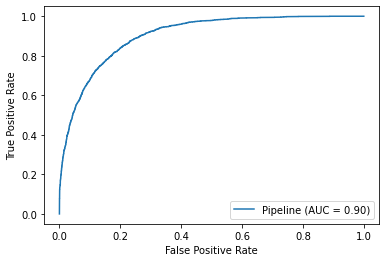

In [138]:
#5. Membuat plot roc

plot_roc_curve(tuned_logit, X_test, y_test)

__SUMMARY:__
- Nilai f1 score naik
- Nilai auc sama
